In [1]:
from datetime import datetime
from getpass import getpass

rdm_url = 'https://bh.rdm.yzwlab.com/' # 'https://staging.rdm.example.com'
idp_name_1 = None # 'GakuNin RDM IdP'
idp_username_1 = None
idp_password_1 = None
idp_name_2 = None # 'GakuNin RDM IdP'
idp_username_2 = None
idp_password_2 = None
rdm_project_name = 'TEST-METADATA-{}'.format(datetime.now().strftime('%Y%m%d-%H%M%S'))
default_result_path = None
close_on_fail = False
transition_timeout = 10000
skip_failed_test = False

In [2]:
if idp_username_1 is None:
    idp_username_1 = input(prompt=f'Username for {idp_name_1}')
if idp_password_1 is None:
    idp_password_1 = getpass(prompt=f'Password for {idp_username_1}@{idp_name_1}')
if idp_username_2 is None:
    idp_username_2 = input(prompt=f'Username for {idp_name_2}')
if idp_password_2 is None:
    idp_password_2 = getpass(prompt=f'Password for {idp_username_2}@{idp_name_2}')
(len(idp_username_1), len(idp_password_1), len(idp_username_2), len(idp_password_2))

In [28]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/tmp/tmpskaks056'

# GakuNinRDM 総合テスト [Metadataアドオン]

- サブシステム名: ストレージ管理
- ページ/アドオン: Metadataアドオン
- 機能分類: ストレージ制御確認
- シナリオ名: *
- 用意するテストデータ: URL一覧、アカウント(既存ユーザー1: GRDM, 既存ユーザー2: GRDM)

In [ ]:
from datetime import datetime
import os
import papermill as pm
import traceback

def make_result_dir(base_path):
    result_dir = os.path.join(base_path, 'notebooks')
    os.makedirs(result_dir, exist_ok=True)
    return result_dir

def run_notebook(result_dir, base_notebook, optional_result_id=None, **optional_params):
    _, filename = os.path.split(base_notebook)
    result_id, _ = os.path.splitext(filename)
    if optional_result_id:
        result_id += optional_result_id
    result_notebook = os.path.join(result_dir, result_id + '.ipynb')
    result_path = os.path.join(result_dir, result_id)
    os.makedirs(result_path, exist_ok=True)
    params = dict(
        rdm_url=rdm_url,
        idp_name_1=idp_name_1,
        idp_username_1=idp_username_1,
        idp_password_1=idp_password_1,
        idp_name=idp_name_1,
        idp_username=idp_username_1,
        idp_password=idp_password_1,
        default_result_path=result_path,
        close_on_fail=True,
        transition_timeout=transition_timeout,
    )
    params.update(optional_params)
    try:
        pm.execute_notebook(
            base_notebook,
            result_notebook,
            parameters=params
        )
    except pm.PapermillExecutionError:
        if not skip_failed_test:
            raise
        print('失敗しました。テストは続行します...')
        traceback.print_exc()
    return result_notebook

result_dir = make_result_dir(default_result_path)
result_notebooks = []
result_dir

'/tmp/tmpbbytg72x/notebooks'

## 「アドオンの有効化」テストの実施

テスト「テスト手順-ストレージ共通-Metadataアドオン」を実施する。

In [30]:
result_notebooks.append(run_notebook(
    result_dir, 'テスト手順-ストレージ共通-Metadataアドオン.ipynb',
    rdm_project_name=rdm_project_name + '-管理者',
))
result_notebooks[-1]

Passed unknown parameter: idp_name
Passed unknown parameter: idp_username
Passed unknown parameter: idp_password


Executing:   0%|          | 0/177 [00:00<?, ?cell/s]

'/tmp/tmpbbytg72x/notebooks/テスト手順-ストレージ共通-Metadataアドオン.ipynb'

## 「非管理者での実行」テストの実施

テスト「テスト手順-Metadataアドオン-非管理者での実行」を実施する。

In [31]:
result_notebooks.append(run_notebook(
    result_dir, 'テスト手順-Metadataアドオン-非管理者での実行.ipynb',
    rdm_project_name=rdm_project_name + '-非管理者',
    idp_name_2=idp_name_2,
    idp_username_2=idp_username_2,
    idp_password_2=idp_password_2,
))
result_notebooks[-1]

Passed unknown parameter: idp_name
Passed unknown parameter: idp_username
Passed unknown parameter: idp_password


Executing:   0%|          | 0/187 [00:00<?, ?cell/s]

'/tmp/tmpbbytg72x/notebooks/テスト手順-Metadataアドオン-非管理者での実行.ipynb'

## 「複数メタデータの一括設定」テストの実施

テスト「テスト手順-Metadataアドオン-複数メタデータの一括設定」を実施する。

In [32]:
result_notebooks.append(run_notebook(
    result_dir, 'テスト手順-Metadataアドオン-複数メタデータの一括設定.ipynb',
    rdm_project_name=rdm_project_name,
))
result_notebooks[-1]

Passed unknown parameter: idp_name
Passed unknown parameter: idp_username
Passed unknown parameter: idp_password


Executing:   0%|          | 0/243 [00:00<?, ?cell/s]

'/tmp/tmpbbytg72x/notebooks/テスト手順-Metadataアドオン-複数メタデータの一括設定.ipynb'

## 「e-Rad情報を用いた自動補完」テストの実施

テスト「テスト手順-Metadataアドオン-e-Rad情報を用いた自動補完」を実施する。

In [33]:
result_notebooks.append(run_notebook(
    result_dir, 'テスト手順-Metadataアドオン-e-Rad情報を用いた自動補完.ipynb',
    rdm_project_name=rdm_project_name,
))
result_notebooks[-1]

Passed unknown parameter: idp_name
Passed unknown parameter: idp_username
Passed unknown parameter: idp_password


Executing:   0%|          | 0/254 [00:00<?, ?cell/s]

'/tmp/tmpbbytg72x/notebooks/テスト手順-Metadataアドオン-e-Rad情報を用いた自動補完.ipynb'

## ウェブブラウザの新規プライベートウィンドウでGRDMトップページを表示する

GRDMトップページが表示されること

In [34]:
import importlib
import pandas as pd

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *
from scripts import grdm

await init_pw_context(close_on_fail=False, last_path=default_result_path)

('20250520-013552', '/tmp/tmp0t7rmlmv')

Start epoch: 1747704952.751212 seconds


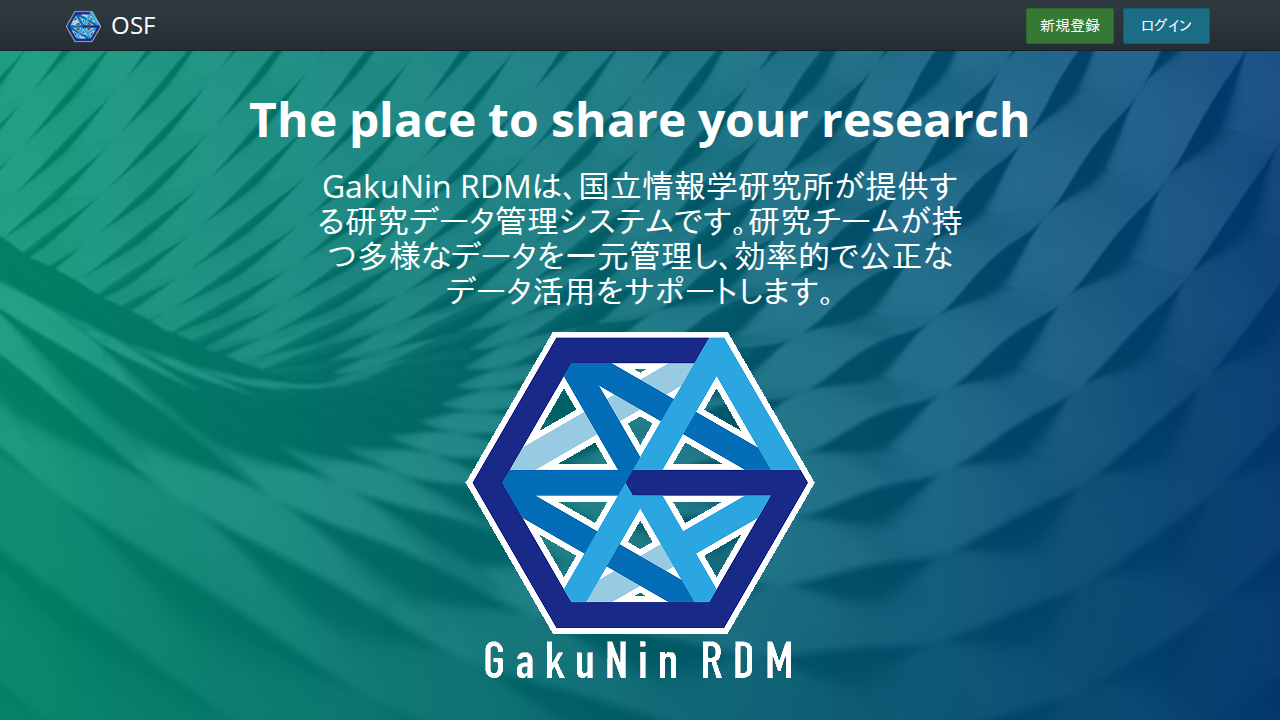

In [35]:
import time

async def _step(page):
    await page.goto(rdm_url)

    # 同意する をクリック
    await page.locator('//button[text() = "同意する"]').click()

    # 同意する が表示されなくなったことを確認
    await expect(page.locator('//button[text() = "同意する"]')).to_have_count(0, timeout=500)

await run_pw(_step)

## ログイン情報を用いてGakuNin RDMにログインする

(IdPに関するログイン情報が与えられた場合、)
GakuNin Embeded DSのプルダウンを展開し、IdPリストから指定されたIdPを選択する。その後、アカウントのID/Passwordを入力して「Login」ボタンを押下する。

(IdPが指定されていない場合、)
CASのログイン操作を実施する。

Start epoch: 1747704955.0530035 seconds


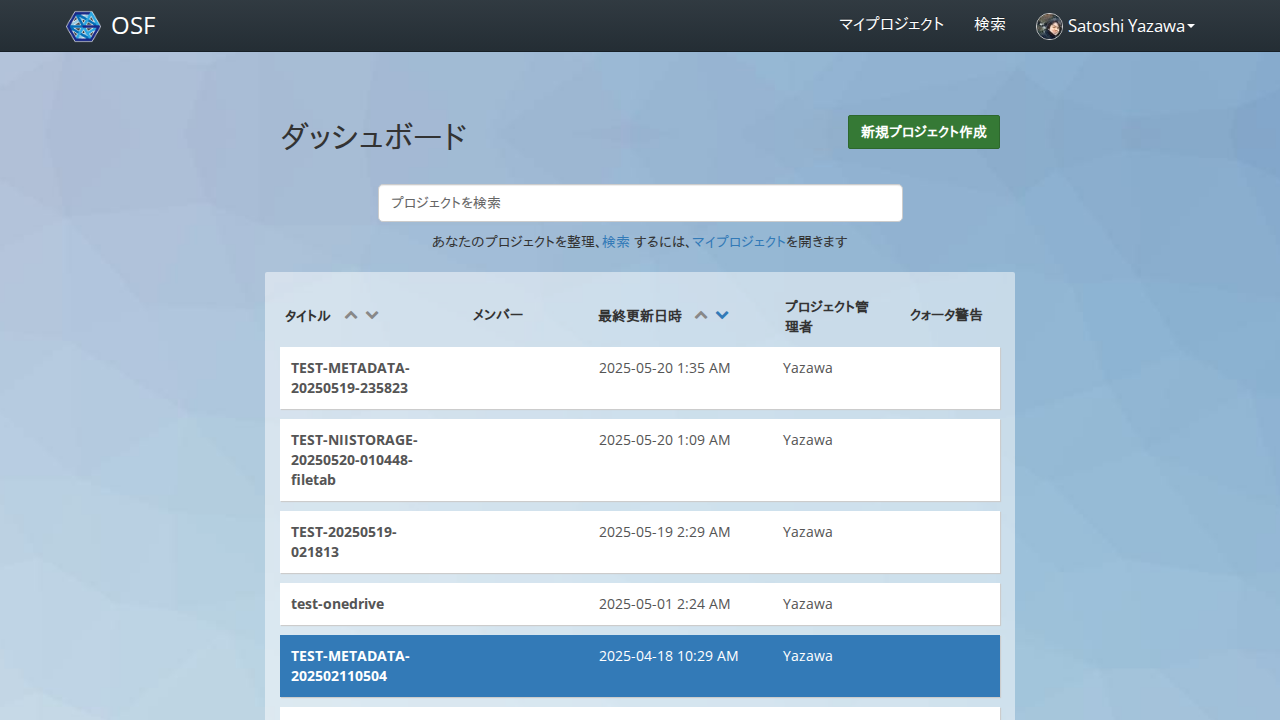

In [36]:
import scripts.grdm
importlib.reload(scripts.grdm)

async def _step(page):
    await scripts.grdm.login(
        page, idp_name_1, idp_username_1, idp_password_1, transition_timeout=transition_timeout
    )

    # GRDMのボタンが表示されることを確認
    await expect(page.locator('//*[text() = "プロジェクト管理者"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## ダッシュボードのプロジェクト一覧から指定されたプロジェクトをクリックする

Start epoch: 1747704958.7681785 seconds


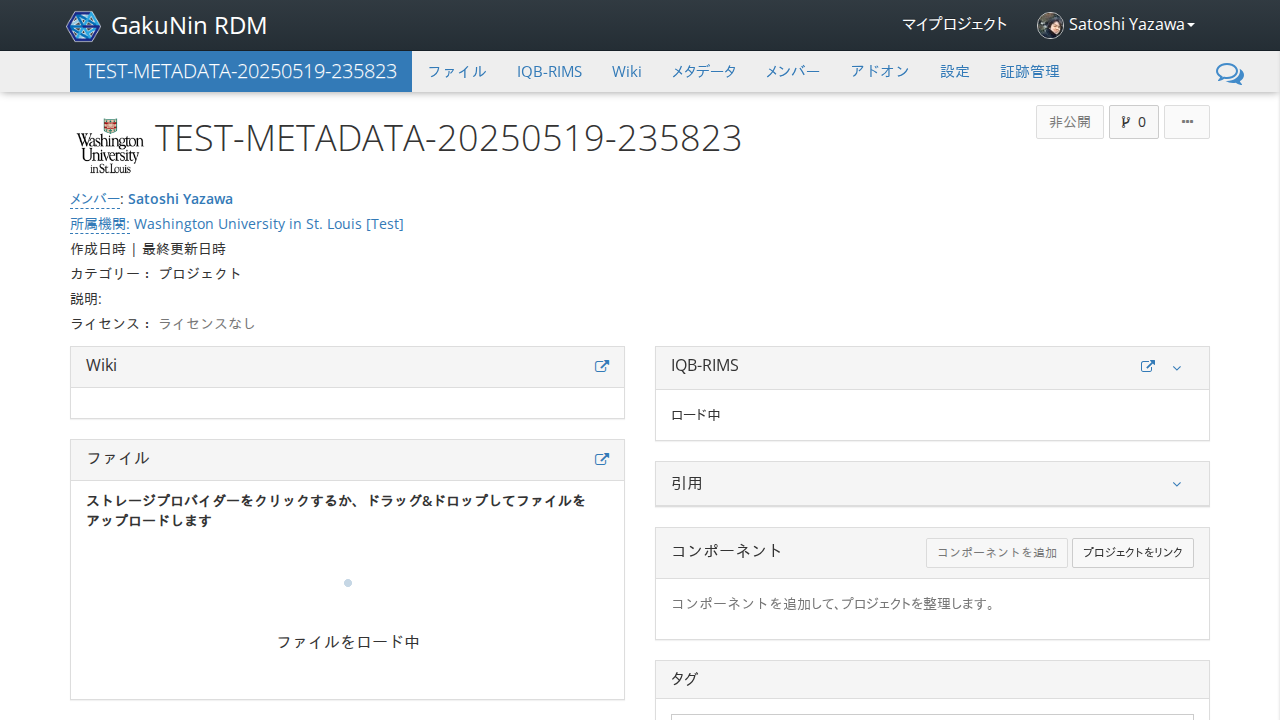

In [37]:
async def _step(page):
    await page.locator(f'//*[@data-test-dashboard-item-title and text()="{rdm_project_name}"]').click()        

    await expect(page.locator('//a[text() = "アドオン"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## プロジェクトを削除する

Start epoch: 1747704960.3941736 seconds
Odum


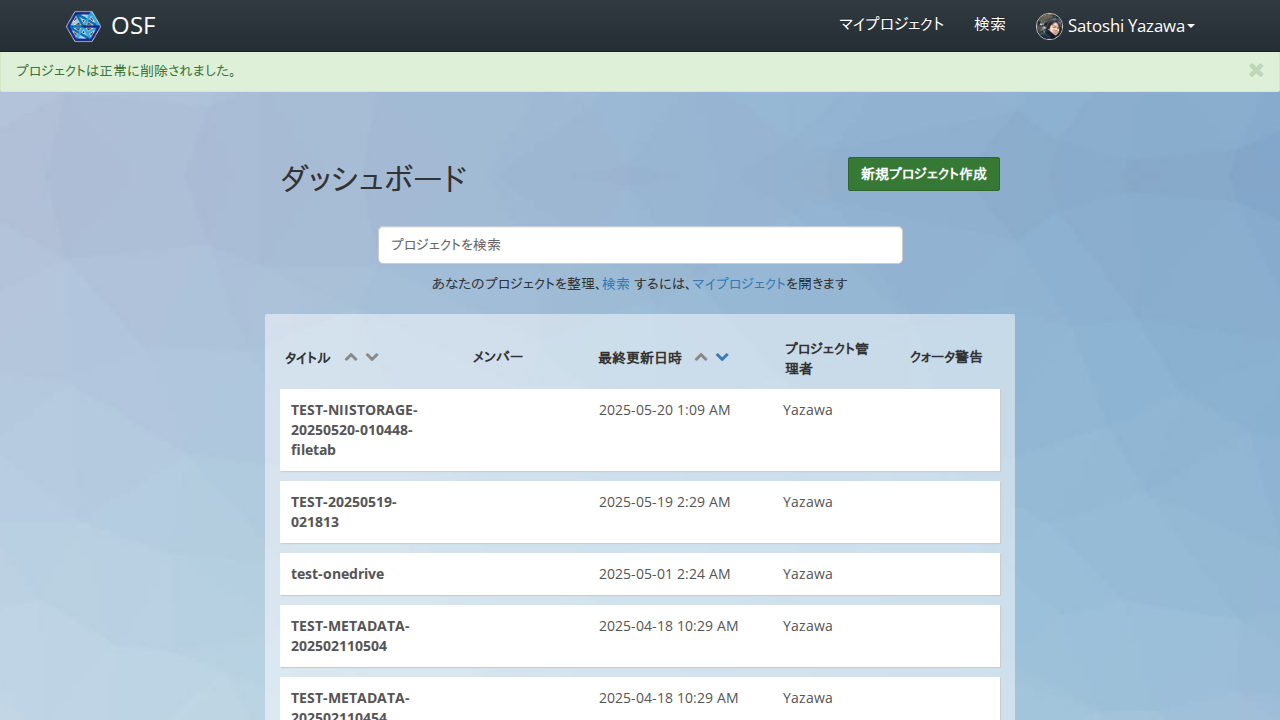

In [38]:
async def _step(page):
    await scripts.grdm.delete_project(page)
    
    await expect(page.locator('//*[text() = "プロジェクト管理者"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

終了処理を実施。

In [39]:
await finish_pw_context()

Video: /tmp/tmpbbytg72x/video-1.webm
HAR: /tmp/tmpbbytg72x/har.zip


スクリーンキャプチャ動画の取得に失敗しました。
Traceback (most recent call last):
  File "/home/jovyan/scripts/playwright.py", line 168, in _finish_pw_context
    shutil.copyfile(video_path, dest_video_path)
  File "/opt/conda/lib/python3.12/shutil.py", line 260, in copyfile
    with open(src, 'rb') as fsrc:
         ^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmp0t7rmlmv/videos/a8d7f918aa841807899980c4707eb618.webm'


In [40]:
!rm -fr {work_dir}